## Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


# Simple Linear Regression

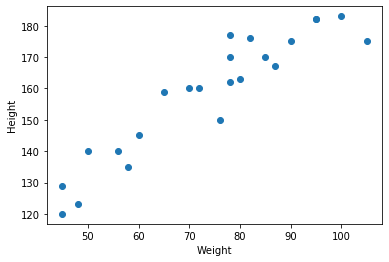

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [4]:
## Divide our dataset into independent and dependent features
X = df[['Weight']]  ## independent features\
## Double [[]] to ensure 2D array for X
y = df['Height']  ## dependent feature
X.shape, y.shape

((23, 1), (23,))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)


In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [8]:
## Standardize the dataset only independent data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
# fit_transform = fit: mean, std for X_train, transform: apply to data
X_train = scaler.fit_transform(X_train)

# Z_score that is calculated based on X_train should be applied, reason being to avoid data leakage
X_test = scaler.transform(X_test)

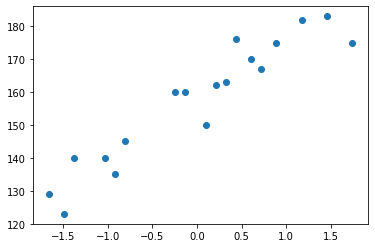

In [10]:
plt.scatter(X_train, y_train)

In [11]:
## Train the Simple linear regression model

from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# Slope
print(f'slope or coefficient of weight is: {regressor.coef_}')
# Intercept
print(f'Intercept: {regressor.intercept_}')

slope or coefficient of weight is: [17.03440872]
Intercept: 157.5


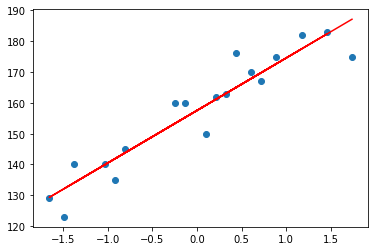

In [14]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [15]:
y_pred_test = regressor.predict(X_test)
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]), 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

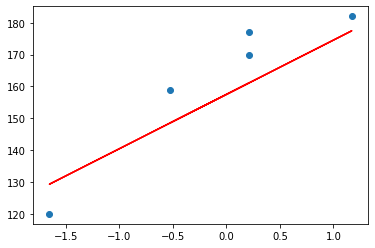

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

## Performance metrics

## MSE, MAE, RMSE

## Model accuracy
### R-square, adj R-square

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [19]:
## Accuracy of model

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_test)
score

0.776986986042344

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [20]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [ ]:
# Assumption


In [21]:
regressor

LinearRegression()

In [22]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\itsme_shaad\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.32350772]])

In [25]:
print(f'The height prediction for weight 80 kg is: {regressor.predict(scaled_weight)}')

The height prediction for weight 80 kg is: [163.01076266]


## Assumption

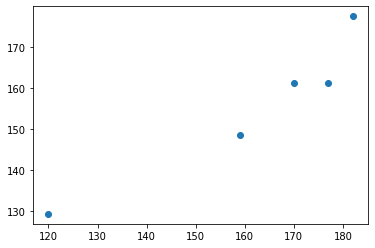

In [27]:

## plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)
# output is linear distributed then the model is well trained

In [28]:
### Residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\itsme_shaad\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\itsme_shaad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\itsme_shaad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


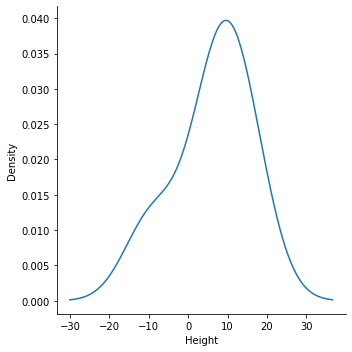

In [34]:
## Plot this residuals
import seaborn as sns
sns.displot(residuals, kind = 'kde')

# We are getting normal distribution

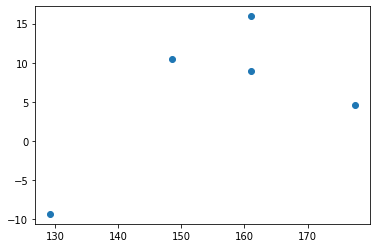

In [35]:
# Below should be normal distribution

plt.scatter(y_pred_test, residuals)